<a href="https://colab.research.google.com/github/LidiaaGP/Mandelbrot_Julia/blob/master/Mandelbrot_Julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A fractal is a geometric figure that exhibits self-similarity.
It emerges from simple mathematical rules applied repeatedly, resulting in complex patterns.

Two of the most well-known examples are the Mandelbrot set and the Julia set.

**The Mandelbrot Set**

The Mandelbrot set is defined using the iterative formula \( z_{n+1} = z_n^2 + c \) where:

*   z^0=0
*   c ∈ C is a complex number representing each point in the complex plane.



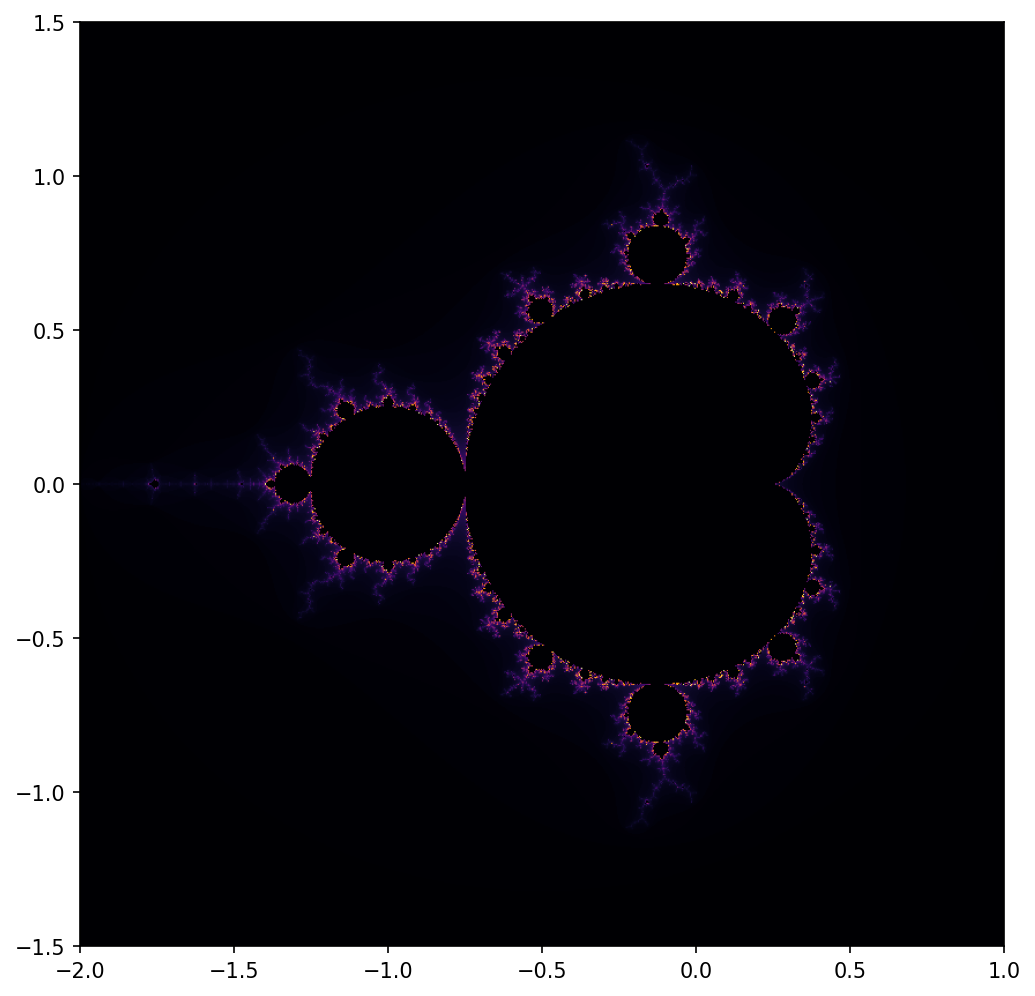

In [2]:
import numpy as np
import matplotlib.pyplot as plt


INITIAL_BOUNDS = (-2, 1, -1.5, 1.5)

def compute_fractal(xmin, xmax, ymin, ymax, width=800, height=800, max_iter=200, c=None):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    if c is None:
        C = Z.copy()  # Mandelbrot
    else:
        C = np.full_like(Z, c)  # Julia

    escape = np.zeros(Z.shape, dtype=int)
    mask = np.ones(Z.shape, dtype=bool)

    for i in range(max_iter):
        Z[mask] = Z[mask]**2 + C[mask]
        escaped = np.abs(Z) > 2
        escape[mask & escaped] = i
        mask &= ~escaped

    return escape


fractal = compute_fractal(*INITIAL_BOUNDS, width=800, height=800, max_iter=200)

plt.figure(figsize=(8,8), dpi=150)
plt.imshow(fractal, extent=INITIAL_BOUNDS, cmap='inferno')
plt.show()




**The Julia sets**

The Julia set is closely related to the Mandelbrot set and uses the same formula. However, the key difference is that in a Julia set:

*  The value of c is fixed.
*  We vary the initial value z_0 across the complex plane.

The interesting thing here is that each point c in the Mandelbrot set corresponds to a different Julia set. If c is inside the Mandelbrot set, the corresponding Julia set is connected (it forms a single piece). If c is outside, the Julia set is disconnected, often forming dust-like structures.

Let's take a look at a zoom into the Mandelbrot set:

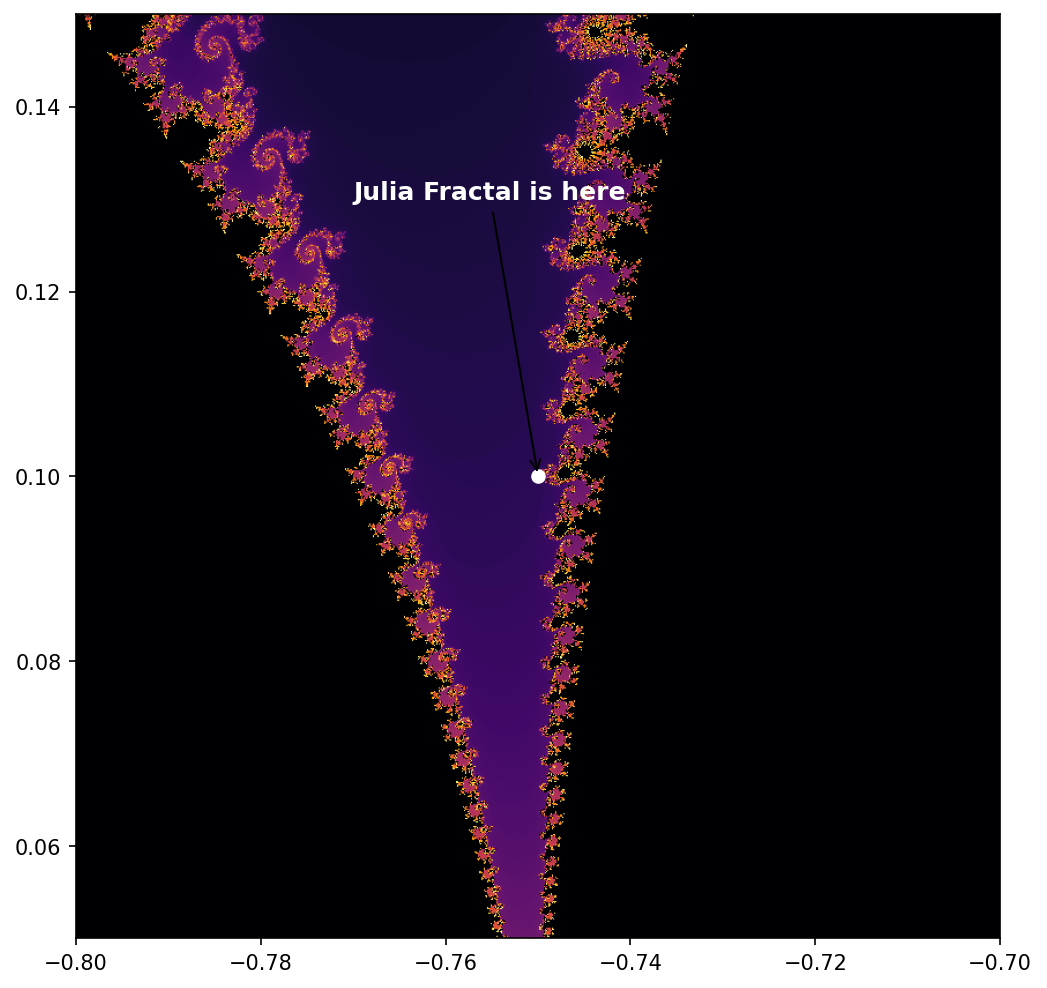

In [ ]:
xmin, xmax = -0.8, -0.7
ymin, ymax = 0.05, 0.15

c_real = -0.75
c_imag = 0.1

fractal = compute_fractal(xmin, xmax, ymin, ymax, width=800, height=800, max_iter=200)

plt.figure(figsize=(8,8), dpi=150)
plt.imshow(fractal, extent=[xmin, xmax, ymin, ymax], cmap='inferno', origin='lower')

plt.plot(c_real, c_imag, 'wo', markersize=6, label='c')

plt.annotate('Julia Fractal is here',
             xy=(c_real, c_imag),
             xytext=(c_real - 0.02, c_imag + 0.03),
             arrowprops=dict(facecolor='white', arrowstyle='->'),
             color='white',
             fontsize=12,
             weight='bold',
             zorder=5)

plt.show()

*Julia Set Example*

Another interesting fact is that when you zoom into the Mandelbrot set, you discover infinite self-similar patterns that keep appearing over and over, often resembling the original fractal.

[Mandelbrot Zoom Video](https://www.youtube.com/watch?v=xVdmXJacAEE)

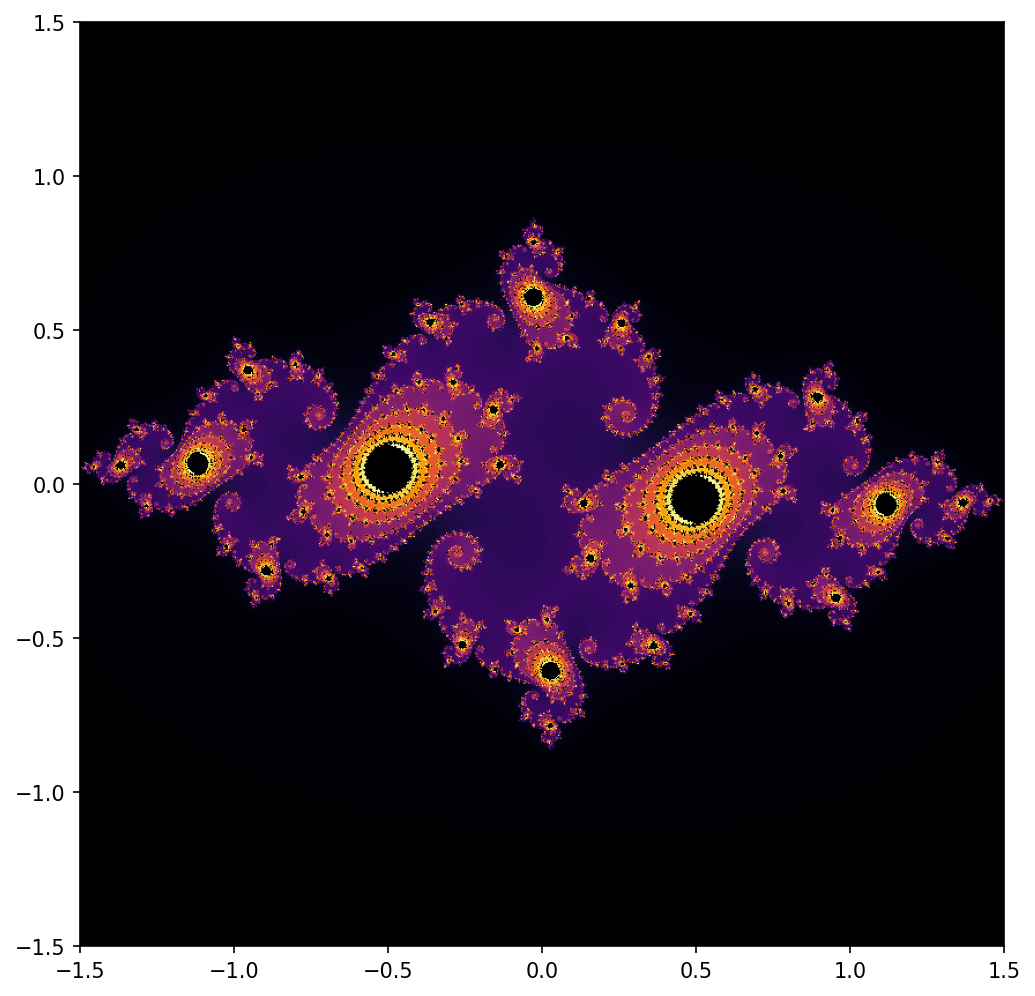

In [3]:
c = -0.75 + 0.1j

[ ]

xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5

fractal = compute_fractal(xmin, xmax, ymin, ymax, width=800, height=800, max_iter=200, c=c)

plt.figure(figsize=(8,8), dpi=150)
plt.imshow(fractal, extent=[xmin, xmax, ymin, ymax], cmap='inferno', origin='lower')
plt.show()